# SpiderNet Basic Testing

Test basic functionality of the network: sampling from a replay buffer and training on the sampled batch. Make sure NN is minimising loss.

In [1]:
from spiderNet import *
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
"""
example feature vectors: state vector size 5, action vector size 5
state-action feature vector size 10

state = [0.3, 0.4, 1.2, 2.6, 0.2]
action = [1.4, 0.2, 0.7, 1.2, 0.3]

state_action = state + action
"""

# make a fake dataset to test if the NN works properly
# size is 10000
data_size = 10000

# 'frontier' would be all the feature vectors in the replay buffer
frontier = np.random.rand(data_size,10)

# Q_true is a made up array of targets just to check that the NN
# is minimising properly, in real implementation the target would
# be dynamically defined using reinforcement lerning
Q_true = np.random.randint(0,10,size=data_size)

print(Q_true)

frontier

[6 5 8 ... 4 3 8]


array([[0.13178862, 0.91640677, 0.87810025, ..., 0.09478314, 0.3140066 ,
        0.68097707],
       [0.69835117, 0.52564979, 0.81632995, ..., 0.74580976, 0.18351994,
        0.92611257],
       [0.71652182, 0.42784679, 0.79839134, ..., 0.51927998, 0.99711167,
        0.35165947],
       ...,
       [0.33365613, 0.41123555, 0.91434559, ..., 0.74940144, 0.54144339,
        0.34576772],
       [0.25755149, 0.58878569, 0.30931744, ..., 0.64278906, 0.74138198,
        0.29601537],
       [0.36016603, 0.14580441, 0.28505043, ..., 0.63843469, 0.90697858,
        0.35906667]])

In [3]:
# check forward prop works
spidernet = spiderNet(input_dimension=10)

Q = spidernet.network.forward(torch.tensor(frontier).float())

Q

tensor([[-0.0772],
        [-0.1187],
        [-0.1529],
        ...,
        [-0.1221],
        [-0.1025],
        [-0.1214]], grad_fn=<AddmmBackward>)

In [4]:
# check batch sampling from frontier works
minibatch = random.sample(list(frontier),32)
print(torch.tensor(minibatch).float().shape)

losses = []

# training steps
steps = 100
# batch size
batch = 128

# train
for i in range(steps):
    # make sure frontier and targets are sampled in the same way
    random.seed(random.randint(0,1000))
    
    minibatch = random.sample(list(frontier),batch)
    Q_true_sample = random.sample(list(Q_true),batch)
    
    # train on batch
    loss = spidernet.train(torch.tensor(minibatch).float(), torch.tensor(Q_true).float())
    losses.append(loss)

torch.Size([32, 10])


/Users/Ricardo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


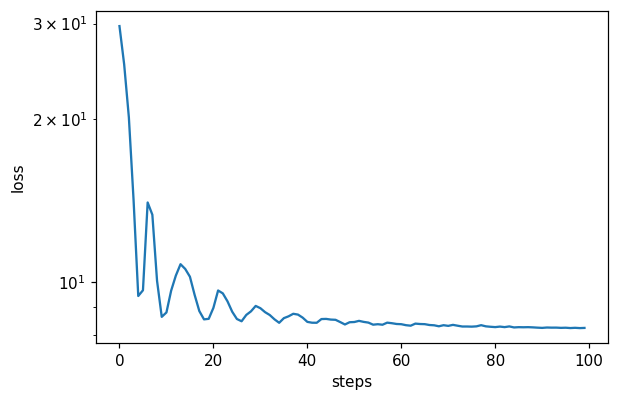

In [5]:
# check loss is going down
plt.figure(dpi=110)
plt.plot([i for i in range(steps)], losses)
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("steps")
plt.show()